# 목적

ocr을 통한 명함 데이터에서 정보 얻어오기

# Tessorect

In [133]:
import pytesseract
from PIL import Image, ImageDraw, ImageFont
import os
import matplotlib.pyplot as plt
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
tessdata_dir_config = '--tessdata-dir "C:/Program Files/Tesseract-OCR/tessdata"'

In [137]:
img = 'C:/Users/User/Desktop/명함/명함.jpg'
target = Image.open(img)

# 이미지에서 한국어 텍스트 추출하기
text = pytesseract.image_to_string(target, config=tessdata_dir_config, lang='kor+eng')
text

'팀장 | 디자인팀\n이자인\n\nCHEE 02-1234-5678\n휴대 010-1234-5678\n메일 somedesgin@naver.com\n\n(주) 썸디자인 연구소 | www.somd.co.kr\n서울특별시 성동구 성수동1가 MSS BF 612호\n\n'

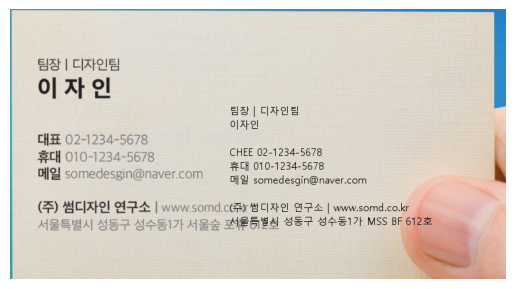

In [138]:
# 이미지에 텍스트 쓰기
draw = ImageDraw.Draw(target)
font = ImageFont.truetype('C:\Windows\Fonts\malgun.ttf', size=16) # 원하는 폰트와 크기 설정
draw.text((350, 150), text, font=font, fill='black')

# 이미지와 텍스트 출력하기
plt.axis('off')
plt.imshow(target)

In [367]:
[t.replace('|', '') for t in text.split('\n')]

['팀장 | 디자인팀',
 '이자인',
 '',
 'CHEE 02-1234-5678',
 '휴대 010-1234-5678',
 '메일 somedesgin@naver.com',
 '',
 '(주) 썸디자인 연구소 | www.somd.co.kr',
 '서울특별시 성동구 성수동1가 MSS BF 612호',
 '',
 '']

In [369]:
# 이메일 정규표현식
email_pattern ='[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
email = re.compile(email_pattern, flags=re.IGNORECASE)

# 휴대전화 정규표현식
phone_pattern ='([0-9]{3}-[0-9]{4}-[0-9]{4})'
phone = re.compile(phone_pattern)

# 주소 정규표현식 -> 하드코딩됨 개선여지
address_pattern = r'(\w+[구,시,군]\s*)?(\w+[구,시]\s*)' \
                  r'(\w+[면,읍]\s*)' \
                  r'?(\w+\d*\w*[동,리,로,길]\s*?\w*)' \
                  r'?(\w*\d+-?\d*)?' \
                  r'?(\w*\s*)?(\w*\s*)' \
                  r'?(\w*\s*)?(\w*\s*)'

address = re.compile(address_pattern)

# 직급, 직책
position = '인턴|수습|사원|주임|계장|대리|과장|차장|부장|감사|이사|상무|전무|부사장|사장|임원|연구원|주임연구원|선임연구원|책임연구원|수석연구원|연구소장|최고 경영자|CEO|대표이사|전무이사|고문|지점장|본부장|비서'
job = '팀원|팀장|실장|총무|지점장|지사장|파트장|그룹장|센터장|매니저|본부장|사업부장|원장|국장'

names = []
jobs = []
positions = []
phones = []
emails = []
addresses = []
urls = []

# 부서,팀 

info = ['name', 'job', 'position', 'phone', 'email', 'address', 'url']

for t in text.split('\n'):

    if len(phone.findall(t)):
        phones.append(phone.findall(t)[0])
        
    if len(email.findall(t)):
        emails.append(email.findall(t)[0])
    
    if len(address.findall(t)):
        addresses.append(re.search(address, t).group())

In [370]:
print(names)
print(jobs)
print(positions)
print(phones)
print(emails)
print(addresses)
print(urls)


[]
[]
[]
['010-1234-5678']
['somedesgin@naver.com']
['연구소 ', '서울특별시 성동구 성수동1가 MSS BF 612호']
[]


In [355]:
position = '인턴?\s|수습|사원|주임|계장|대리|과장|차장|부장|감사|이사|상무|전무|부사장|사장|임원|연구원|주임연구원|선임연구원|책임연구원|수석연구원|연구소장|최고 경영자|CEO|대표이사|전무이사|고문|지점장|본부장|비서'
job = '팀원|팀장?\s|실장|총무|지점장|지사장|파트장|그룹장|센터장|매니저|본부장|사업부장|원장|국장'

print(re.search(job, '이정진 팀장  김미영 대리').group())

팀장 


In [356]:
re.search(job, '팀장 | 디자인팀')

<re.Match object; span=(0, 3), match='팀장 '>

In [351]:
pos = re.compile(position)
re.search(position, text)

In [328]:
address = r'(\w+[구,시,군]\s*)?(\w+[구,시]\s*)' \
          r'(\w+[면,읍]\s*)' \
          r'?(\w+\d*\w*[동,리,로,길]\s*?\w*)' \
          r'?(\w*\d+-?\d*)?' \
          r'?(\w*\s*)?(\w*\s*)' \
          r'?(\w*\s*)?(\w*\s*)'
        
re.search(address, '서울특별시 성동구 성수동1가 MSS BF 612호')

<re.Match object; span=(0, 27), match='서울특별시 성동구 성수동1가 MSS BF 612호'>

In [343]:
address = r'(\w+[구,시,군]\s*)?(\w+[구,시]\s*)' \
          r'(\w+[면,읍]\s*)' \
          r'?(\w+\d*\w*[동,리,로,길]\s*?\w*)' \
          r'?(\w*\d+-?\d*)?' \
          r'?(\w*\s*)?(\w*\s*)' \
          r'?(\w*\s*)?(\w*\s*)'
        
len(re.search(address, '서울특별시 성동구 성수동1가 MSS BF 612호').group())

27

In [340]:
re.search(address, text).group()

'연구소 '

In [288]:
p = re.compile('^[http?s://]+[a-zA-Z0-9-]+/[a-zA-Z0-9-_.?=]+$')
re.search(p, text)

# Keras-ocr

In [168]:
import matplotlib.pyplot as plt
import keras_ocr
import glob
import os 
import cv2
from itertools import chain
import numpy as np

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for C:\Users\User\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\User\.keras-ocr\crnn_kurapan.h5


In [169]:
file_path = r'C:\Users\User\Desktop\out'
file_lists = []
for paths in os.listdir(file_path):
    file_lists.append(glob.glob(os.path.join(file_path,paths)+'/*'))

cv2 한글경로 인식 문제로 tools.read 대신 직접 이미지를 읽는다

In [170]:
imgs = [np.fromfile(files, np.uint8) for files in list(chain(*file_lists))]
imgs = [cv2.imdecode(img, cv2.IMREAD_COLOR) for img in imgs]

In [96]:
prediction_groups = [pipeline.recognize([img]) for img in imgs]

1/1 [==============================] - 0s 77ms/step


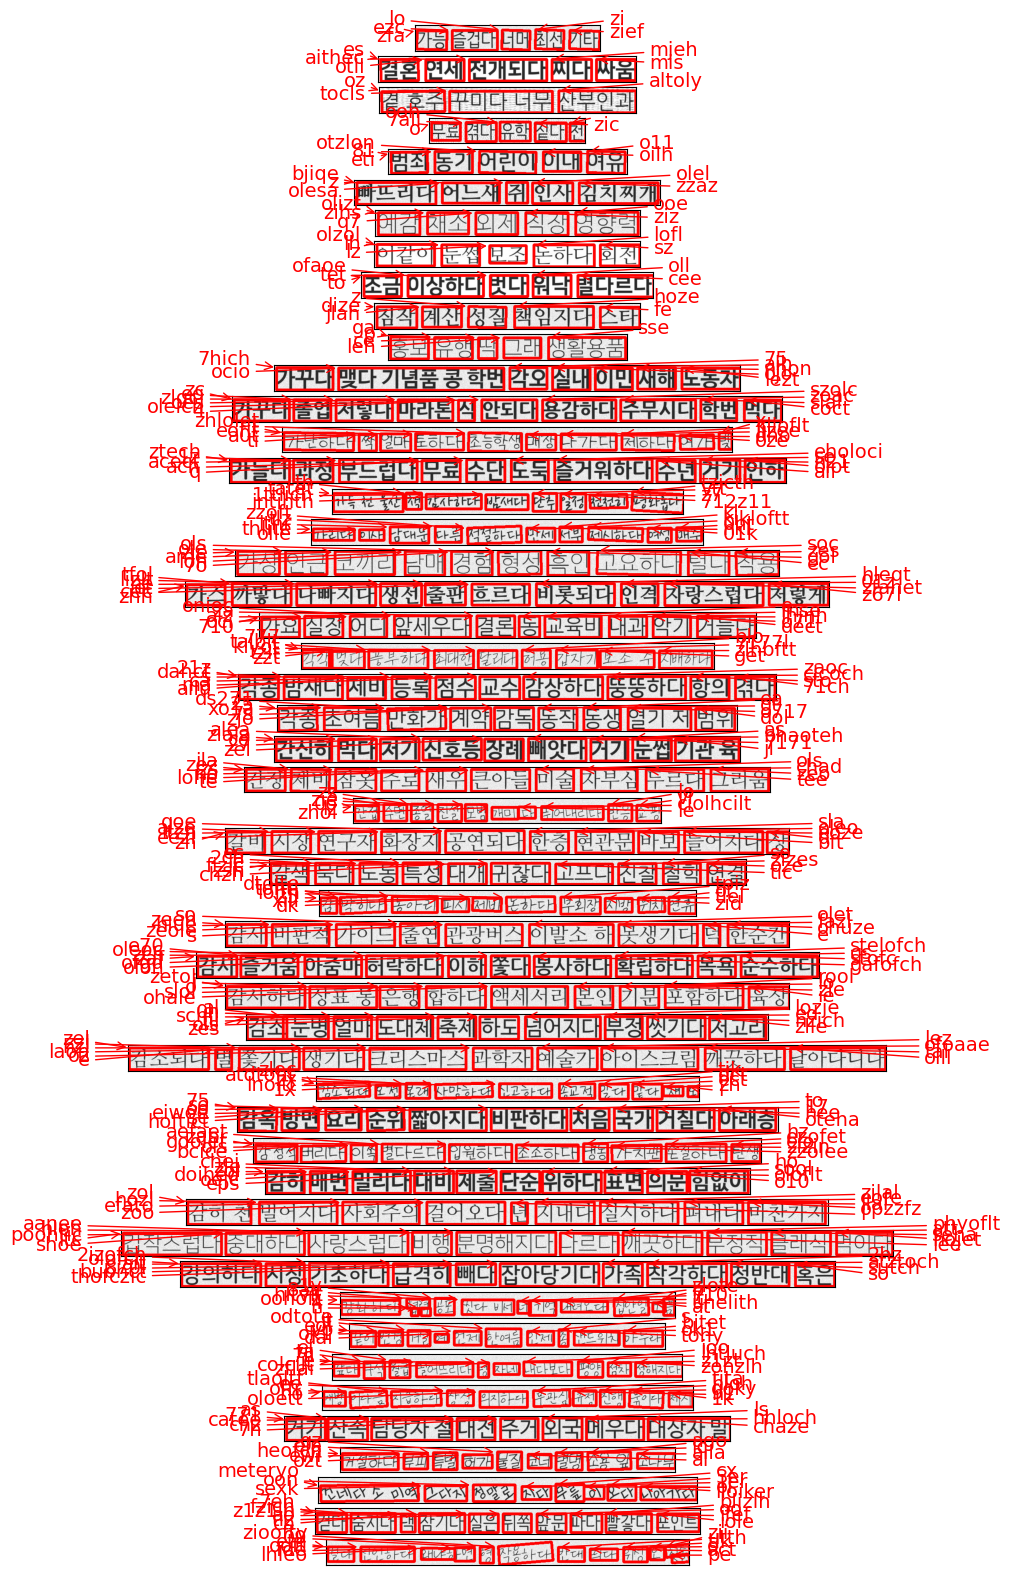

In [98]:
# Plot the predictions
fig, axs = plt.subplots(nrows=50, figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=imgs[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

한글 지원이 되지 않아서 한글을 직접 학습시켜보았다.

데이터: https://github.com/parksunwoo/ocr_kor

In [171]:
import re

labels = []
for paths in os.listdir(file_path):
    labels.append(os.listdir(os.path.join(file_path, paths)))
    
labels = labels[:-1]
labels = list(chain(*labels))
y = []
for x in labels:
    y.append(re.sub('_[000-999]+.jpg','',x))
y[:10]

['가능 즐겁다 너머 최선 기타',
 '결혼 연세 전개되다 찌다 싸움',
 '곁 호주 꾸미다 너무 산부인과',
 '무료 겪다 유학 짙다 천',
 '범죄 동기 어린이 이내 여유',
 '빠뜨리다 어느새 쥐 인사 김치찌개',
 '예감 채소 외제 직장 영향력',
 '이같이 눈썹 보조 논하다 회전',
 '조금 이상하다 벗다 워낙 별다르다',
 '짐작 계산 성질 책임지다 스타']

In [189]:
plt.rc('font', family='HYGothic-Extra')

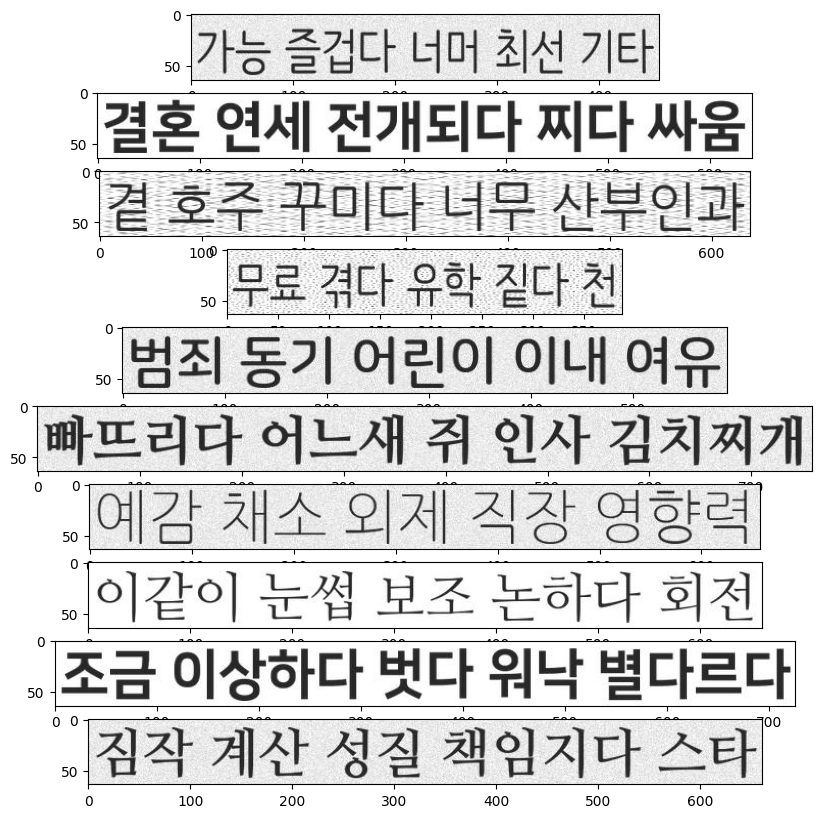

In [195]:
plt.rc('font', family='sans-serif')
fig, axs = plt.subplots(nrows=10, figsize=(10, 10))
for idx, ax in enumerate(axs):
    # ax.set_title(y[idx])
    ax.imshow(imgs[idx])